In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import metpy
import xarray as xr
import pandas as pd
from scipy import signal
from mpl_toolkits.basemap import Basemap

import warnings
warnings.simplefilter('ignore')

C:\Users\User\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\User\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
dipole = pd.read_excel("DMI.xlsx",0) #Membaca Data

In [3]:
dipole_SON = dipole[['TAHUN','SEP','OKT','NOV']] 

In [4]:
dmi_1979 = dipole_SON.loc[np.where((dipole_SON['TAHUN'] == 1979))[0][0]:,:].reset_index().drop('index',axis=1)[:-1]

In [5]:
dmi_son = (dmi_1979['SEP']+dmi_1979['OKT']+dmi_1979['NOV'])

In [6]:
DMI_std = np.std(dmi_son)
DMI_std

1.2232790949737846

In [7]:
cek = pd.Series(dmi_son/DMI_std)
def bar_color(cek,color1,color2):
    return np.where(cek.values>0,color1,color2).T

No handles with labels found to put in legend.


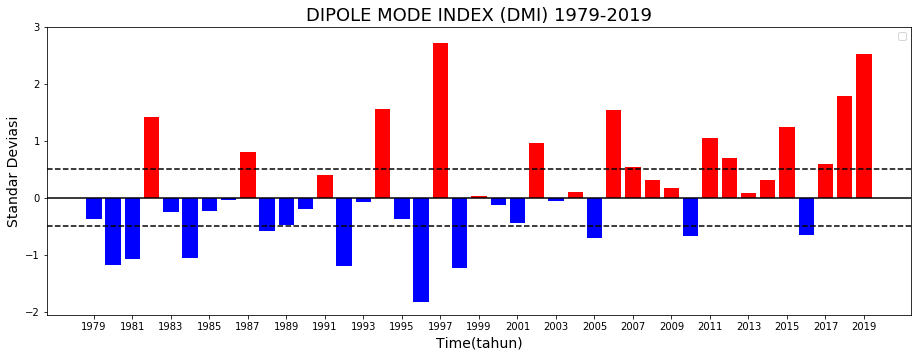

In [8]:
fig1 = plt.figure()
ax = fig1.add_axes([0,0,2,1])

plt.bar(dmi_1979['TAHUN'],dmi_son/DMI_std, color=bar_color(cek,'r','b'))

ax.set_title('DIPOLE MODE INDEX (DMI) 1979-2019', fontsize=18)
ax.set_yticks(np.arange(-2,4,1))
ax.set_xticks(np.arange(1979,2020,2))
ax.axhline(0,color='black')
ax.axhline(0.5,color='black', linestyle='--')
ax.axhline(-0.5,color='black', linestyle='--')
ax.set_ylabel('Standar Deviasi', fontsize=14)
ax.set_xlabel('Time(tahun)', fontsize=14)
ax.legend()


In [9]:
join = pd.concat([dmi_1979['TAHUN'],dmi_son],keys=['Tahun', 'DMI_SON'], axis=1).dropna()

In [10]:
#Dipole Mode Netral
join.loc[np.where((join['DMI_SON'] < 0.5) & (join['DMI_SON'] > -0.5))[0], ['Tahun', 'DMI_SON']].reset_index().drop('index', axis=1)

,Tahun,DMI_SON
0,1979,-0.456
1,1983,-0.311
2,1985,-0.274
3,1986,-0.045
4,1990,-0.234
5,1991,0.498
6,1993,-0.086
7,1995,-0.452
8,1999,0.033
9,2000,-0.156


In [11]:
#Dipole Mode Positif
join.loc[np.where((join['DMI_SON'] > 0.5) )[0], ['Tahun', 'DMI_SON']].reset_index().drop('index', axis=1)

,Tahun,DMI_SON
0,1982,1.738
1,1987,0.985
2,1994,1.912
3,1997,3.312
4,2002,1.177
5,2006,1.894
6,2007,0.668
7,2011,1.283
8,2012,0.853
9,2015,1.512


In [12]:
#Dipole Mode Negatif
join.loc[np.where((join['DMI_SON'] < -0.5) )[0], ['Tahun', 'DMI_SON']].reset_index().drop('index', axis=1)

,Tahun,DMI_SON
0,1980,-1.431
1,1981,-1.302
2,1984,-1.291
3,1988,-0.713
4,1989,-0.587
5,1992,-1.470
6,1996,-2.229
7,1998,-1.504
8,2001,-0.530
9,2005,-0.853


# Visualisasi

In [13]:
map = Basemap(projection='cyl',llcrnrlon=40,llcrnrlat=-20,urcrnrlon=140,urcrnrlat=20,resolution='i') # projection, lat/lon extents and resolution of polygons to draw
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full

In [15]:
prec_sst = xr.open_dataset('NEW_DATA(SST,MSLP,TP).nc')
sst = prec_sst['sst'].sel(latitude=slice(20, -20), longitude=slice(40,150))
sst = sst.rolling(time=3, center=True).mean()

In [16]:
lons_precip = sst.longitude.values
lats_precip = sst.latitude.values
lons_2d_precip, lats_2d_precip = np.meshgrid(lons_precip, lats_precip)
waktu_sst = np.asarray(sst['time'], dtype = 'datetime64[h]')

In [17]:
start_indeks = np.where(waktu_sst == np.datetime64('1980-09-01'))[0][0]
end_indeks = np.where(waktu_sst == np.datetime64('1980-11-01'))[0][0]
sst_son = sst.values[start_indeks:end_indeks+1,:,:]
sst_son.shape

(3, 2, 161, 401)

In [18]:
for x in range(1981,2020,1): 
    start_indeks = np.where(waktu_sst == np.datetime64(str(x)+'-09-01'))[0][0]
    end_indeks = np.where(waktu_sst == np.datetime64(str(x)+'-11-01'))[0][0]
    sst_son = np.concatenate((sst_son,sst.values[start_indeks:end_indeks+1,:,:]))

In [19]:
sst_SON_DP = np.nanmean(( sst_son[42:45,:,:] + sst_son[51:54,:,:] + sst_son[66:69,:,:] + sst_son[78:81,:,:] + sst_son[81:84,:,:] +
                                    sst_son[93:96,:,:] + sst_son[96:99,:,:] + sst_son[105:108,:,:] + sst_son[114:117,:,:]+ 
                                    sst_son[111:114,:,:] + sst_son[117:120,:,:] )/11, axis=0)
sst_SON_DN = np.nanmean((sst_son[36:39,:,:] + sst_son[48:51,:,:] + sst_son[54:57,:,:] + sst_son[75:78,:,:]+ 
                                     sst_son[90:93,:,:] + sst_son[108:111,:,:]  )/6, axis=0)

In [20]:
mean_son = np.nanmean(sst_son, axis=0)

anom_sst_son_dp = np.nanmean((sst_SON_DP - mean_son), axis=0)
anom_sst_son_dn = np.nanmean((sst_SON_DN - mean_son), axis=0)
anom_sst_son_dn.shape

(161, 401)

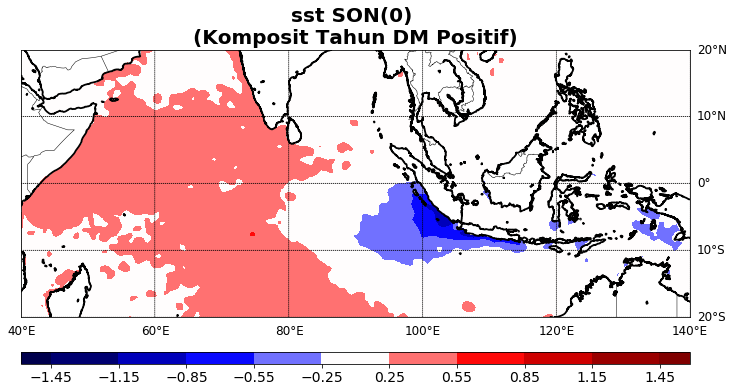

In [21]:
fig=plt.figure(figsize=(12,9))
plt.title('sst SON(0) \n(Komposit Tahun DM Positif)', fontsize=20, fontweight='bold')

map.drawcoastlines(linewidth=1.8)
map.drawstates()
map.drawcountries()

parallels = np.arange(-20,21,10)
map.drawparallels(parallels,labels=[False,True,True,False],fontsize=12)
meridians = np.arange(40,151,20)
map.drawmeridians(meridians,labels=[True,False,False,True],fontsize=12)

clevs = [-1.45 ,-1.15, -0.85, -0.55, -0.25, 0.25, 0.55, 0.85, 1.15, 1.45]
cf = map.contourf(lons_2d_precip,lats_2d_precip, anom_sst_son_dp ,cmap='seismic',  levels=clevs, extend='both')

cbar = plt.colorbar(cf, orientation="horizontal", ticks=clevs,aspect=50, pad=0.07,  extendrect=True)
cbar.ax.tick_params(labelsize=14)
plt.savefig('SST Dipole Mode Positif.png')

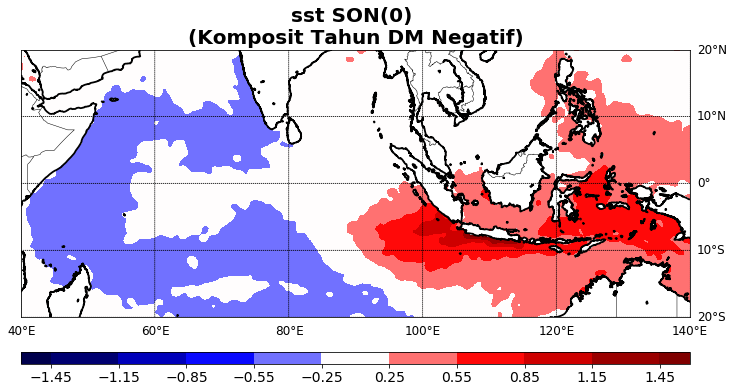

In [22]:
fig=plt.figure(figsize=(12,9))
plt.title('sst SON(0) \n(Komposit Tahun DM Negatif)', fontsize=20, fontweight='bold')

map.drawcoastlines(linewidth=1.8)
map.drawstates()
map.drawcountries()

parallels = np.arange(-20,21,10)
map.drawparallels(parallels,labels=[False,True,True,False],fontsize=12)
meridians = np.arange(40,151,20)
map.drawmeridians(meridians,labels=[True,False,False,True],fontsize=12)

clevs = [-1.45 ,-1.15, -0.85, -0.55, -0.25, 0.25, 0.55, 0.85, 1.15, 1.45]
cf = map.contourf(lons_2d_precip,lats_2d_precip, anom_sst_son_dn ,cmap='seismic',  levels=clevs, extend='both')

cbar = plt.colorbar(cf, orientation="horizontal", ticks=clevs,aspect=50, pad=0.07,  extendrect=True)
cbar.ax.tick_params(labelsize=14)
plt.savefig('SST Dipole Mode Negatif.png')